In [22]:
import pandas as pd

# Load the data
file_path = 'GoG.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data
data.tail(20)

,Date,Open,High,Low,Close,Adj Close,Volume
5098,2024-11-19,173.720001,178.869995,173.559998,178.119995,177.916092,23434900
5099,2024-11-20,177.339996,177.679993,173.779999,175.979996,175.778534,18997100
5100,2024-11-21,173.899994,174.130005,163.699997,167.630005,167.438110,59734400
5101,2024-11-22,165.850006,166.460007,163.899994,164.759995,164.571381,38604600
5102,2024-11-25,166.089996,168.630005,165.610001,167.649994,167.458069,33135300
5103,2024-11-26,167.630005,169.820007,167.580002,169.119995,168.926392,20486700
5104,2024-11-27,169.000000,169.479996,168.020004,169.229996,169.036270,19266500
5105,2024-11-29,168.500000,169.429993,167.160004,168.949997,168.756592,14257200
5106,2024-12-02,168.770004,172.080002,168.570007,171.490005,171.293686,23789100
5107,2024-12-03,171.490005,172.679993,170.850006,171.339996,171.143845,22248700


In [23]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

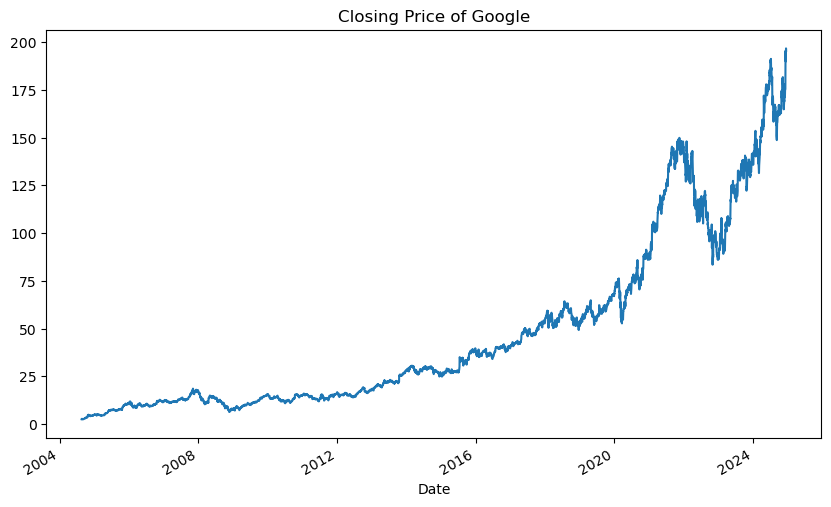

In [24]:
import matplotlib.pyplot as plt

# Plotting the closing price
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data['Close'].plot(figsize=(10, 6))
plt.title('Closing Price of Google')
plt.show()


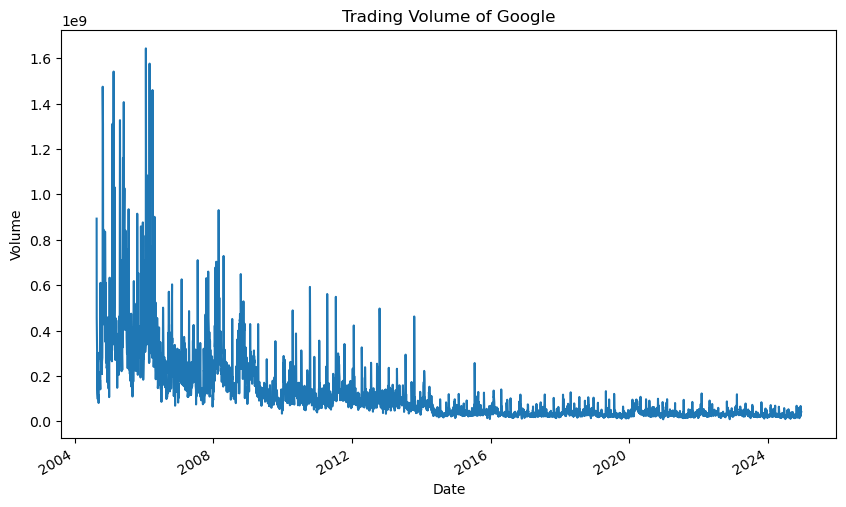

In [25]:
# Plotting the trading volume
data['Volume'].plot(figsize=(10, 6))
plt.title('Trading Volume of Google')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


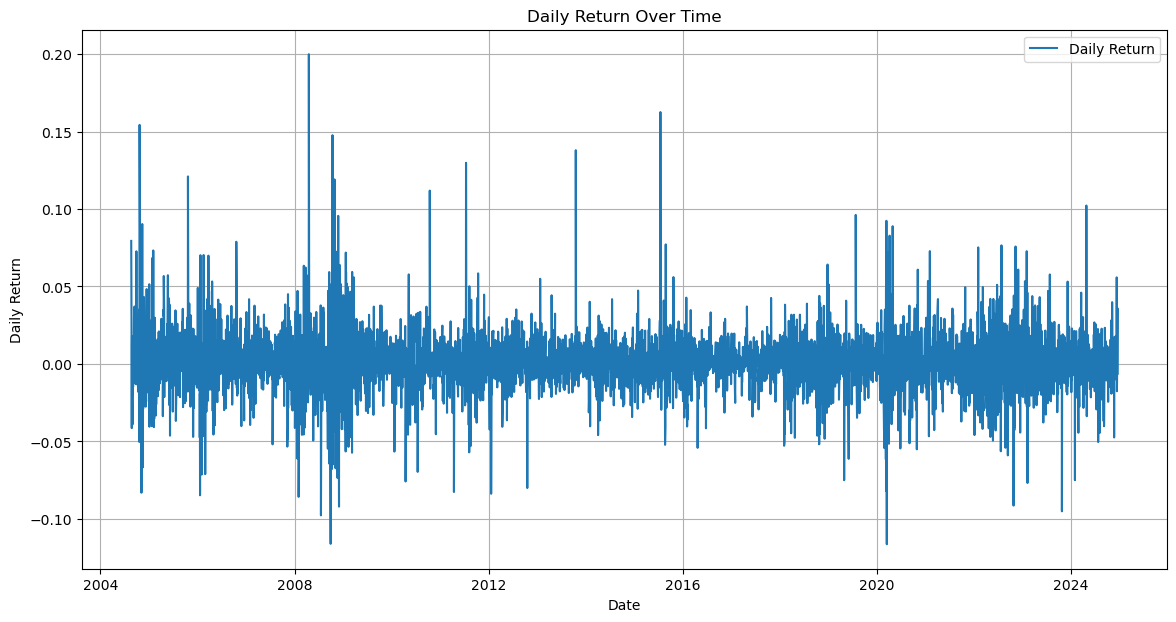

c:\Users\fisio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


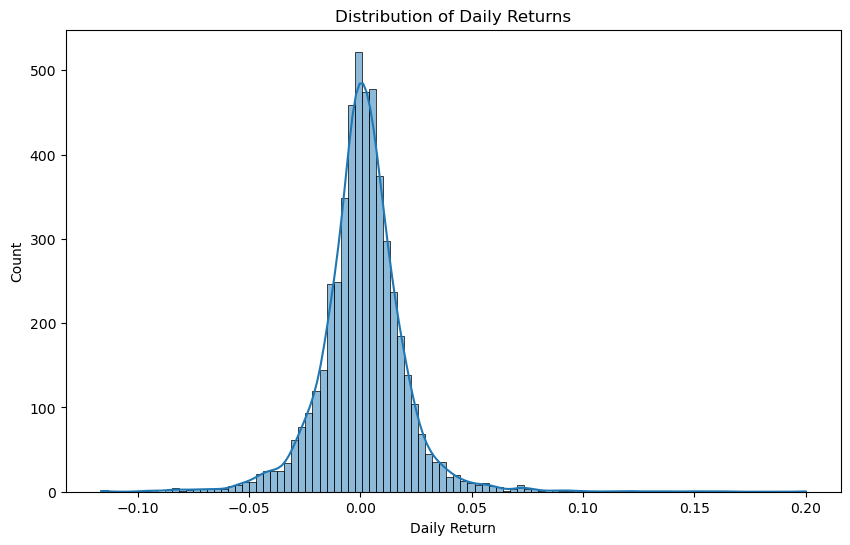

In [26]:
import seaborn as sns

data["Daily Return"] = data["Close"].pct_change()
plt.figure(figsize=(14,7))
plt.plot(data["Daily Return"],label="Daily Return")
plt.title("Daily Return Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data['Daily Return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.show()

In [27]:
stock_data = pd.read_csv(file_path)

# Convert 'Date' column to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Set 'Date' as the index
stock_data.set_index('Date', inplace=True)

# Handle missing values
stock_data.fillna(method='ffill', inplace=True)

# Create additional features
stock_data['MA_10'] = stock_data['Close'].rolling(window=10).mean()
stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['Return'] = stock_data['Close'].pct_change()

# Drop the first row with NaN values created by pct_change()
stock_data = stock_data.dropna()


C:\Users\fisio\AppData\Local\Temp\ipykernel_21428\3309916522.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='ffill', inplace=True)


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define features and target
features = ['Open', 'High', 'Low', 'Volume', 'MA_10', 'MA_50', 'Return']
target = 'Close'

X = stock_data[features]
y = stock_data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.25443742059391644


In [29]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [33]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)

# Load the trained model
model = joblib.load('random_forest_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    df = pd.DataFrame(data)
    prediction = model.predict(df)
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

c:\Users\fisio\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


C:\Users\fisio\AppData\Local\Temp\ipykernel_21428\3328647323.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Mean Absolute Error: 0.12754517398611473


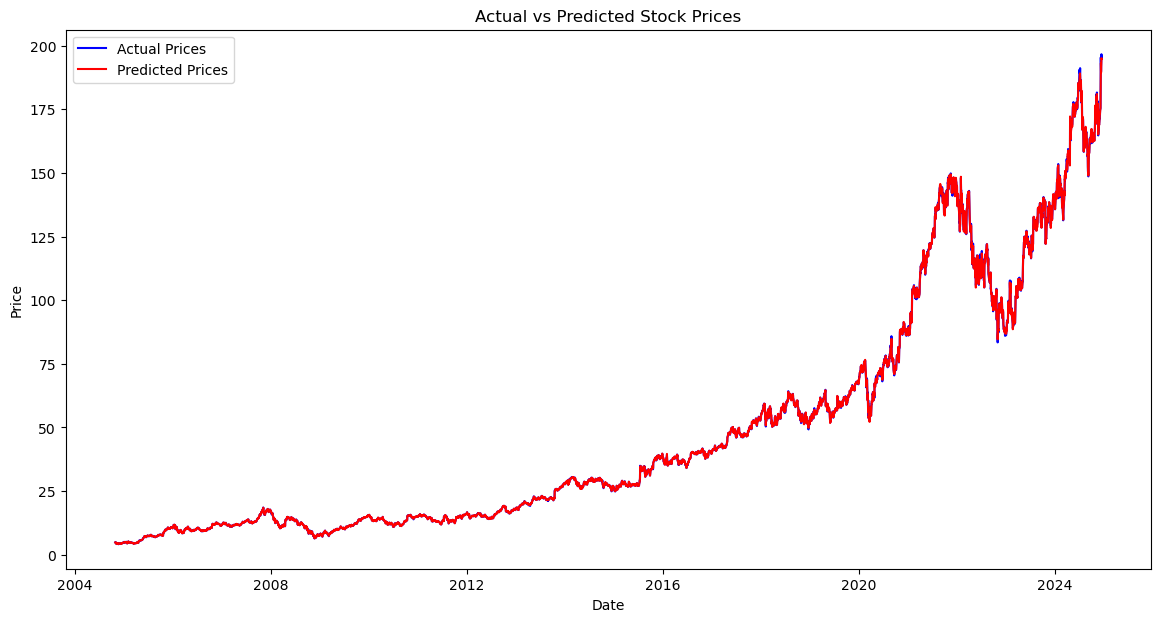

In [32]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Load the dataset
file_path = 'GoG.csv'  # Update this path accordingly
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Handle missing values
data.fillna(method='ffill', inplace=True)

# Create additional features
data['MA_10'] = data['Close'].rolling(window=10).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['Return'] = data['Close'].pct_change()

# Drop the first row with NaN values created by pct_change()
data = data.dropna()

# Define features and target
features = ['Open', 'High', 'Low', 'Volume', 'MA_10', 'MA_50', 'Return']

X = data[features]

# Load the trained model
model = joblib.load('random_forest_model.pkl')

# Predict the closing prices
predicted_close = model.predict(X)

# Create a DataFrame for comparison
comparison_df = data.copy()
comparison_df['Predicted_Close'] = predicted_close

# Calculate MAE
mae = mean_absolute_error(data['Close'], predicted_close)
print(f"Mean Absolute Error: {mae}")

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(comparison_df.index, comparison_df['Close'], label='Actual Prices', color='blue')
plt.plot(comparison_df.index, comparison_df['Predicted_Close'], label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()
